Github repository: https://github.com/jmlarios/AI-MACHINE-LEARNING-FOUNDATIONS

In [123]:
import pandas as pd

# **Data Loading and Initial Exploration**

In [124]:
D = pd.read_excel('titanic3.xlsx')

D

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# **First Impression of the Data**

At first sight we can identify some columns/features that instantly seem important to predict if the passengers survived and some that don't really seem to have an impact on the outcome. The first impression was to include the features 'pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare' and 'boat', although dropping certain columns will be discussed after. The rest of the remaining features though, did not seem necessary at all.

The first thing done was to see any missing values in the untouched dataset and then we would choose what to drop and what to either undersample or oversample if there were still missing values in any of the chosen features.

In [125]:
D.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [126]:
D.isnull().sum() / len(D) * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

# **Dropping Columns**

For this assignment I considered most important the features 'pclass', 'survived', 'sex', 'age' and 'parch'. For me this were the most relevant features when it comes to predicting the outcome of a passenger. For 'home.dest', 'embarked', 'cabin', 'body', 'ticket' it kind of seemed obvious to drop this columns as they didn't really, at least to my impression, alter or condition the outcome of the passenger nearly at all, so the natural thing was to drop them. For 'fare', 'sibsp' and 'name' there was more doubt about if they should be dropped or not, in the end I just decided to try and drop them as I felt the rest of the features that were mentioned in the very beggining of this markdown were the most important to make an accurate prediction.

In [127]:
D.drop(columns=['home.dest'], inplace=True)
D.drop(columns=['embarked'], inplace=True)
D.drop(columns=['cabin'], inplace=True)
D.drop(columns=['body'], inplace=True)
D.drop(columns=['fare'], inplace=True)
D.drop(columns=['boat'], inplace=True)
D.drop(columns=['ticket'], inplace=True)
D.drop(columns=['sibsp'], inplace=True)
D.drop(columns=['name'], inplace=True)

D

,pclass,survived,sex,age,parch
0,1,1,female,29.0000,0
1,1,1,male,0.9167,2
2,1,0,female,2.0000,2
3,1,0,male,30.0000,2
4,1,0,female,25.0000,2
...,...,...,...,...,...
1304,3,0,female,14.5000,0
1305,3,0,female,NaN,0
1306,3,0,male,26.5000,0
1307,3,0,male,27.0000,0


In [128]:
D.isnull().sum()

pclass        0
survived      0
sex           0
age         263
parch         0
dtype: int64

## **Managing Missing Values**

After choosing the features that the model would be trained and tested on, the dataset was checked again for missing values and some of them popped up on the 'age' feature. To solve this impasse I decided to overfill the missing values as I felt that there were too many missing values to just drop the rows with them.

After seeing the output of the following cell, we can see that the standard deviation is somewhat high in the 'age' feature, therefore for the missing values the filling of those values was done using the median, as the mean would not represent a balanced outcome.

In [129]:
D.describe()

,pclass,survived,age,parch
count,1309.000000,1309.000000,1046.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.385027
std,0.837836,0.486055,14.413500,0.865560
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000
75%,3.000000,1.000000,39.000000,0.000000
max,3.000000,1.000000,80.000000,9.000000


In [130]:
D['age'].fillna(D['age'].median(), inplace=True)

C:\Users\jmlar\AppData\Local\Temp\ipykernel_34584\2680789371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D['age'].fillna(D['age'].median(), inplace=True)


In [131]:
D.isnull().sum()

pclass      0
survived    0
sex         0
age         0
parch       0
dtype: int64

# **Data Encoding**

For categorical variables OneHotEncoder is used as it was suggested in the guidelines. In this case the variables encoded are 'sex' and 'pclass'. In the following cell we can see they have been dummified for each class of the feature.

Encoding categorical variables is a substantial step for machine learning as it allows the model to handle the categorical variables as numerical after the process of dummyfying the variables. As we know for each class that a feature has a column is created to generate a binary representation of if the class is true or not, this ensures that the model can handle and interpret the categorical variables more appropriately.

In [132]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_sex = encoder.fit_transform(D[['sex']]).toarray()
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['sex']))

encoded_pclass = encoder.fit_transform(D[['pclass']]).toarray()
encoded_pclass_df = pd.DataFrame(encoded_pclass, columns=encoder.get_feature_names_out(['pclass']))

D_encoded = pd.concat([D, encoded_sex_df, encoded_pclass_df], axis=1).drop(columns=['sex', 'pclass'])

D_encoded

,survived,age,parch,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,29.0000,0,1.0,0.0,1.0,0.0,0.0
1,1,0.9167,2,0.0,1.0,1.0,0.0,0.0
2,0,2.0000,2,1.0,0.0,1.0,0.0,0.0
3,0,30.0000,2,0.0,1.0,1.0,0.0,0.0
4,0,25.0000,2,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1304,0,14.5000,0,1.0,0.0,0.0,0.0,1.0
1305,0,28.0000,0,1.0,0.0,0.0,0.0,1.0
1306,0,26.5000,0,0.0,1.0,0.0,0.0,1.0
1307,0,27.0000,0,0.0,1.0,0.0,0.0,1.0


After encoding the categorical variables, what would follow with regards to numerical variables would be either standardization or normalization. Upon expanding my knowledge about why the use of either one of these, it really depends on the model to decide which of them to use. Normalization basically scales data to a certain range of values, using *MinMaxScaler* it would scale them between 0 and 1. And Standardization rescales the data so that the distribution has a mean of 0 and a standard deviation of 1, as would happen in a Standard Normal Distribution. For a Logistic Regression model it is more appropriate to implement Standardization so that will be done with the feature 'age' which contains numerical data.

Standarization for the numerical variables, which, in this case the 'age' feature will be done after the splitting of the data as it most likely will cause Data Leakage if done before. After that process correlations will be checked as well

# **Splitting the Data**

To split the data we need training, validation and test sets, so following the reccomendation on the guidelines first the data will be split in two sets training and temp sets, and then the temp set will be split again to get both the testing and validation sets.

Also, while splitting, it is ensured that the parameter *stratify* is considered as this allows for the split data to reflect the original distribution of the target variable.

In [133]:
from sklearn.model_selection import train_test_split

X = D_encoded.drop(columns=['survived'])
y = D_encoded['survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# **Checking for Data Leakage**

Just to make sure, the correlations were checked to see if any leakage was happening. Before that, the numerical variable was now Standardized after splitting the data, as doing it before could cause a data leakage.

In [134]:
from sklearn.preprocessing import StandardScaler

num_features = ['age']

scaler = StandardScaler()

D_encoded[num_features] = scaler.fit_transform(D_encoded[num_features])

D_encoded

,survived,age,parch,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,-0.039005,0,1.0,0.0,1.0,0.0,0.0
1,1,-2.215952,2,0.0,1.0,1.0,0.0,0.0
2,0,-2.131977,2,1.0,0.0,1.0,0.0,0.0
3,0,0.038512,2,0.0,1.0,1.0,0.0,0.0
4,0,-0.349075,2,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1304,0,-1.163009,0,1.0,0.0,0.0,0.0,1.0
1305,0,-0.116523,0,1.0,0.0,0.0,0.0,1.0
1306,0,-0.232799,0,0.0,1.0,0.0,0.0,1.0
1307,0,-0.194040,0,0.0,1.0,0.0,0.0,1.0


Like the correlations in the heatmap below and also the correlation summary demonstrates, there are no strong correlations that indicate any traces of data leakage, so we should be able to continue and adress/check for data imbalance.

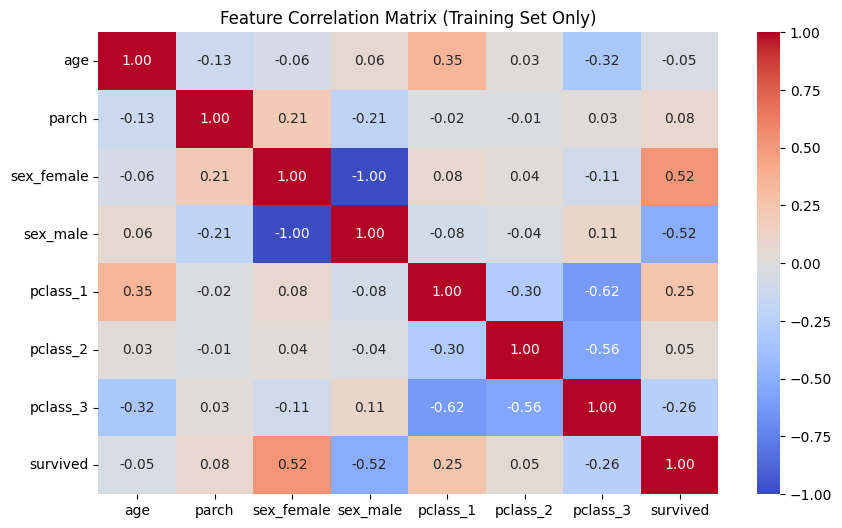


Feature Correlations with Survived (Training Set Only):

survived      1.000000
sex_female    0.520356
pclass_1      0.248337
parch         0.079826
pclass_2      0.051105
age          -0.053414
pclass_3     -0.256820
sex_male     -0.520356
Name: survived, dtype: float64


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

train_corr = pd.DataFrame(X_train, columns=D_encoded.columns.drop("survived", errors='ignore'))
train_corr["survived"] = y_train

correlation_matrix = train_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix (Training Set Only)')
plt.show()

correlations = correlation_matrix["survived"].sort_values(ascending=False)
print("\nFeature Correlations with Survived (Training Set Only):\n")
print(correlations)

There are no signs of a strong correlation to the 'survived' feature, therefore there is no data leakage present

# **Checking Class Imbalance**

The original dataset itself showed a majority of zeros (0), representing that the passenger did not survive contrary to the much less ones (1) that say that the passenger did. This most likely represented a class imbalance, which for the training set, would be perjudicial as it most likely would introduce a bias since we would be training our model on biased and imbalanced data. To check for this a count of the values was performed as it shows below.

Class Distribution:
 survived
0    485
1    300
Name: count, dtype: int64

Class Proportions (%):
 survived
0    61.783439
1    38.216561
Name: proportion, dtype: float64


C:\Users\jmlar\AppData\Local\Temp\ipykernel_34584\87154532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


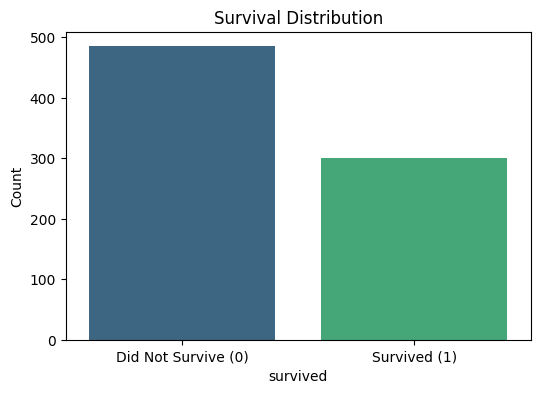

In [136]:
class_counts = y_train.value_counts()
print("Class Distribution:\n", class_counts)

survival_rate = y_train.value_counts(normalize=True) * 100
print("\nClass Proportions (%):\n", survival_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(ticks=[0,1], labels=["Did Not Survive (0)", "Survived (1)"])
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()


Previous cell shows a clear imbalance between the 'survived' and 'not survived' classes for the training set. This is an issue that needs fixing before training the Logistic Regression model, so oversampling using SMOTE technique will be applied in order to address class imbalance. This will generate synthetic sampling of the minority class so that we may have a balanced dataset to train the model on.

In [137]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Class Distribution:
 survived
0    485
1    485
Name: count, dtype: int64

Class Proportions (%):
 survived
0    50.0
1    50.0
Name: proportion, dtype: float64


C:\Users\jmlar\AppData\Local\Temp\ipykernel_34584\4202916517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


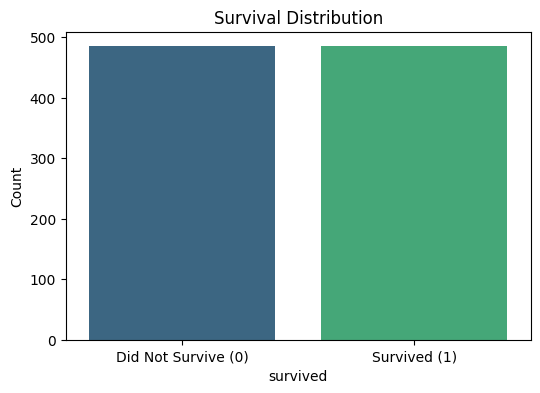

In [138]:
class_counts = y_train_resampled.value_counts()
print("Class Distribution:\n", class_counts)

survival_rate = y_train_resampled.value_counts(normalize=True) * 100
print("\nClass Proportions (%):\n", survival_rate)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(ticks=[0,1], labels=["Did Not Survive (0)", "Survived (1)"])
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()


Now both classes on the training set have a balanced distribution for both sides so that the model can be trained on a balanced dataset. Now there is no class imbalance between the two classes in the target feature so we can now proceed with the model training.

# **Feature Selection**



For the task of feature selection, it is necessary to check and see if there are any features with either low variance or high correlation. This because if a feature had low variance, it signifies that there is not enough or substantial variability between samples in the dataset, so that feature would not really provide useful information to help distinguish or predict any patterns. High correlation on the other hand is bad as we can fall into a multicollinearity problem. This basically means that they provide redundancy to the model, which can capture noise and produce overfitting.

In [139]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)

X_train_selected = selector.fit_transform(X_train)

kept_features = X_train.columns[selector.get_support()]

dropped_features = X_train.columns[~selector.get_support()]

print("Dropped Low Variance Features:")
print(dropped_features)


Dropped Low Variance Features:
Index([], dtype='object')


In the cell above we can see that no features where dropped when checking for low variance in them. This means that the features used are well spread out between different samples, so the model is provided with useful information.

In [140]:
import numpy as np

corr_matrix = X_train.corr()
threshold = 0.9

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print("Dropped Highly Correlated Features:")
print(to_drop)

X_train_selected = X_train.drop(columns=to_drop)


Dropped Highly Correlated Features:
['sex_male']


In the cell above we can see that one of the features was dropped, 'sex_male'. The reasoning behind the drop of this feature is it had a high correlation most definetly with the feature 'sex_female'. As there were only two classes in the 'sex' feature of the original dataset, when dummyfied, they are most likely going to maintain a perfect correlation between the two new features, as if one happens the other one does not, and viceversa. This causes an issue as it feeds redundant information when training the model and trying to identify patterns that predict the target variable. By removing the 'sex_male' feature we should be increasing model performance and quality.

Regarding the question could we have done Feature Selection before splitting the data, the short answer is no. The main reasoning is that if we performed feature selection before the splitting of the dataset, we might accidentally use information that would be in the test and validation sets after the splitting is done, which would cause data leakage. This because the model would already have experienced some patterns from the sets alien to the training set, leading to inflated metrics and overall outcome. This last part would also mean that the model would already have "seen" some information and would not be predicting based on new never seen data, most likely already creating a bias.

# **Training a Logistic Regression Model**

Now that 

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', random_state=42)

In [142]:
y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7595

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       162
           1       0.68      0.71      0.69       100

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



In [143]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8053

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       162
           1       0.73      0.78      0.75       100

    accuracy                           0.81       262
   macro avg       0.79      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262


Confusion Matrix on Test Set:
[[133  29]
 [ 22  78]]



Confusion Matrix on Test Set:


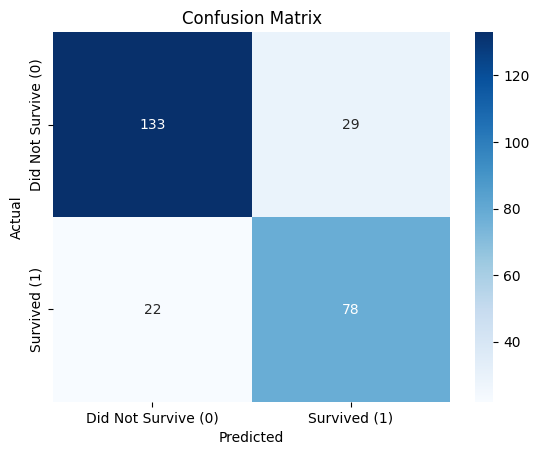

In [144]:
print("\nConfusion Matrix on Test Set:")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Did Not Survive (0)", "Survived (1)"], yticklabels=["Did Not Survive (0)", "Survived (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

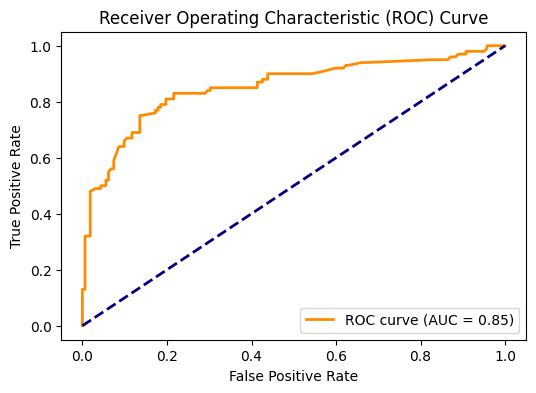


AUC (Area Under the Curve) for Test Set: 0.8521


In [145]:
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC (Area Under the Curve) for Test Set: {roc_auc:.4f}")